In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import linalg
%matplotlib inline

In [2]:
def plot_loglike(L):
    plt.plot(L[:,0],L[:,3])
    plt.xlabel('MC steps')
    plt.ylabel('Log likelihood')
    #plt.axis((0.0,2000,-20000,-15000))
    Size = plt.gcf().get_size_inches()                                                                                                                       
    plt.gcf().set_size_inches(0.6*Size[0],0.6*Size[1])                                                                                                       
    plt.tight_layout()                                                                                                                                       
    plt.savefig('loglike.eps')
    plt.show()
    print('final loglike=',L[-1,3])

In [3]:
def plot_pmf_las(F,nbin,dx,xlow,epsfile):
    ## answer
    kT=0.6; a=2.5*kT*16.0; d=1.0;
    X1 = np.linspace(-0.35,1.5,num=20)
    Y1 = a*X1**2*(X1-d)**2
    X2 = np.linspace(0.5,2.35,num=20)
    Y2 = a*(X2-d)**2*(X2-2*d)**2 - 4.0*kT
    plt.plot(X1,Y1/kT,'k',X2,Y2/kT,'k')
    ##
    nt = len(F[:,0])
    Q = np.linspace(0.5*dx+xlow,(nbin-0.5)*dx+xlow,nbin)
    plt.plot(Q,F[nt-2,:]-np.amin(F[nt-2,:]),'r')
    plt.plot(Q,F[nt-1,:]-np.amin(F[nt-1,:])-4.0,'b')
    plt.xlabel('Position x')
    plt.ylabel('V(x) [kT]')
    plt.axis((-0.5,2.5,-4,5))
    Size = plt.gcf().get_size_inches()                                                                                                                       
    plt.gcf().set_size_inches(0.6*Size[0],0.6*Size[1])                                                                                                       
    plt.tight_layout()                                                                                                                                       
    plt.savefig(epsfile)
    plt.show()

In [4]:
def plot_pmf_error(F,nbin,dx,xlow,epsfile):
    ## answer
    kT=0.6; a=2.5*kT*16.0; d=1.0;
    X1 = np.linspace(-0.35,1.5,num=20)
    Y1 = a*X1**2*(X1-d)**2
    X2 = np.linspace(0.5,2.35,num=20)
    Y2 = a*(X2-d)**2*(X2-2*d)**2 - 4.0*kT
    plt.plot(X1,Y1/kT,'k',X2,Y2/kT,'k')
    ##
    nt = int(len(F[:,0])*0.8); nt2 =  int(len(F[:,0])*0.2);
    F2 = F[nt+1:,:] # last part of data                                                                                                                         
    AV1 = np.average(F2[0::2,:],axis=0)
    #SD1 = np.std(F2[0::2,:],axis=0)/np.sqrt(nt2*0.5)
    SD1 = np.std(F2[0::2,:],axis=0)
    AV2 = np.average(F2[1::2,:],axis=0)
    SD2 = np.std(F2[1::2,:],axis=0)
    Q = np.linspace(0.5*dx+xlow,(nbin-0.5)*dx+xlow,nbin)
    plt.plot(Q,AV1-np.amin(AV1),'r-')
    plt.errorbar(Q,AV1-np.amin(AV1),yerr=SD1,fmt='.',color='r')
    plt.plot(Q,AV2-np.amin(AV2)-4.0,'b-')
    plt.errorbar(Q,AV2-np.amin(AV2)-4.0,yerr=SD2,fmt='.',color='b')
    plt.xlabel('Position x')
    plt.ylabel('V(x) [kT]')
    plt.axis((-0.5,2.5,-4,5))
    Size = plt.gcf().get_size_inches()                                                                                                                       
    plt.gcf().set_size_inches(0.6*Size[0],0.6*Size[1])                                                                                                       
    plt.tight_layout()                                                                                                                                       
    plt.savefig(epsfile)
    plt.show()
    ## save pmf
    outf = open('pmf_av.out','w')
    for ibin in range(nbin):
        outf.write('%8.3f' % (AV1[ibin]-np.amin(AV1)))
    outf.write('\n')
    for ibin in range(nbin):
        outf.write('%8.3f' % (AV2[ibin]-np.amin(AV2)))
    outf.write('\n')
    outf.close()

In [5]:
def plot_d(D,dx,dt,epsfile):
    nt = int(len(D)*0.5)
    X = np.linspace(0,nt-1,nt)*10.0
    plt.plot(X,np.exp(D[::2])*(dx**2/dt))
    plt.xlabel('MC steps')
    plt.ylabel('D')
    #plt.axis((0.0,2000,0.0,0.2))
    Size = plt.gcf().get_size_inches()                                                                                                                       
    plt.gcf().set_size_inches(0.6*Size[0],0.6*Size[1])                                                                                                       
    plt.tight_layout()                                                                                                                                       
    plt.savefig(epsfile)
    plt.show()
    return np.exp(D[-1])*(dx**2/dt)

In [6]:
def plot_d_error(D,dx,dt):
    nt = int(len(D)*0.8); nt2 = int(len(D)*0.2);
    D2 = np.exp(D[nt::2])*(dx**2/dt) # last part of data                                                                                                                         
    av = np.average(D2)
    sd = np.std(D2)
    #sd = np.std(D2)/np.sqrt(nt2)
    return av,sd

In [7]:
def plot_rate(R):
    plt.plot(R[:,0],R[:,1])
    plt.plot(R[:,0],R[:,2])
    #plt.semilogy(R[:,0],R[:,1])
    #plt.semilogy(R[:,0],R[:,2])
    plt.xlabel('MC steps')
    plt.ylabel('Switching rate')
    #plt.axis((0.0,2000,0.0,500.0))
    Size = plt.gcf().get_size_inches()                                                                                                                       
    plt.gcf().set_size_inches(0.6*Size[0],0.6*Size[1])                                                                                                       
    plt.tight_layout()                                                                                                                                       
    plt.savefig('rate.eps')
    plt.show()

# Main starts here

In [8]:
nbin = 27
dx = 0.1
dt = 1.0 ## always 1 because real time unit is used in the program
xlow=-0.35
lagstep =400

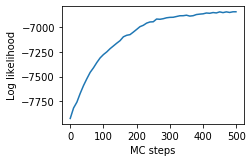

final loglike= -6843.45


In [9]:
## plotting loglikelihood
L = np.loadtxt('loglike.out')
plot_loglike(L)

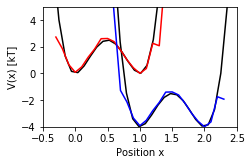

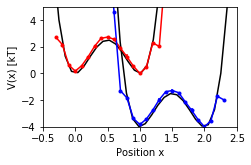

In [10]:
## plotting PMF                                                                                                                                                  
F = np.loadtxt('pmf.out')
plot_pmf_las(F,nbin,dx,xlow,'pmf_las.eps')
plot_pmf_error(F,nbin,dx,xlow,'pmf_av.eps')

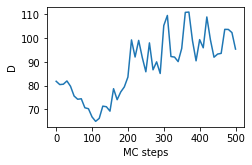

Dav= 98.86513165311975 Dsd= 5.10614757644933


In [11]:
## plotting D                                                                                                        
D = np.loadtxt('diffcoef.out')
Dlas = plot_d(D,dx,dt,'diffcoef.eps')
Dav,Dsd = plot_d_error(D,dx,dt); print('Dav=',Dav,'Dsd=',Dsd);

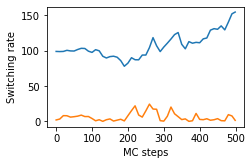

In [12]:
R=np.loadtxt('rate.out')
plot_rate(R)

### Plot trajectories

itraj= 0


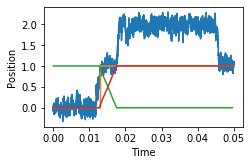

itraj= 1


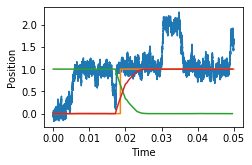

itraj= 2


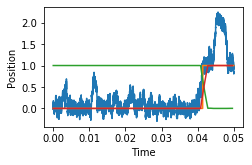

itraj= 3


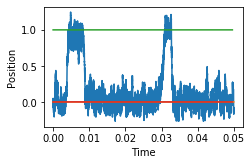

itraj= 4


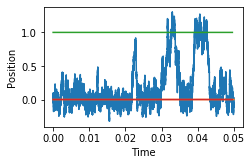

itraj= 5


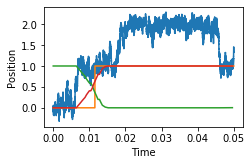

itraj= 6


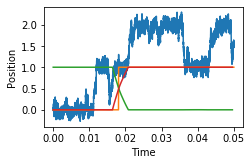

itraj= 7


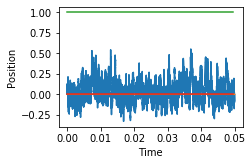

itraj= 8


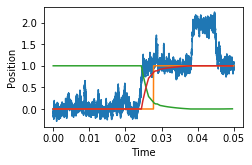

itraj= 9


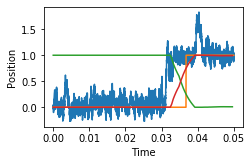

itraj= 10


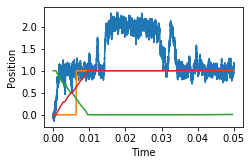

itraj= 11


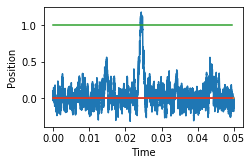

itraj= 12


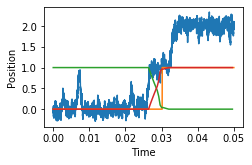

itraj= 13


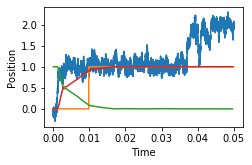

itraj= 14


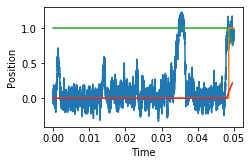

itraj= 15


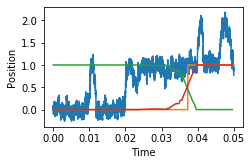

itraj= 16


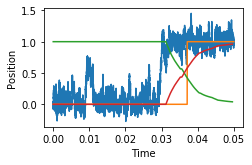

itraj= 17


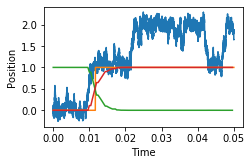

itraj= 18


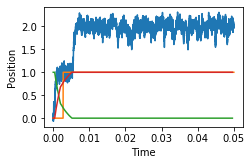

itraj= 19


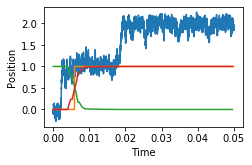

itraj= 20


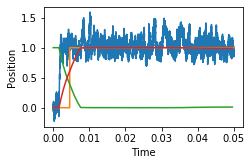

itraj= 21


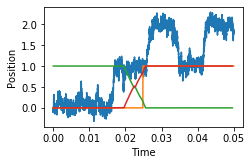

itraj= 22


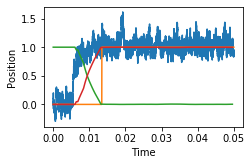

itraj= 23


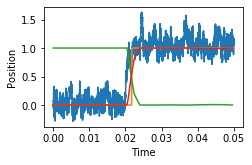

itraj= 24


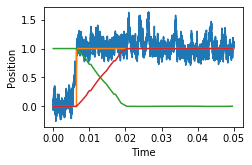

itraj= 25


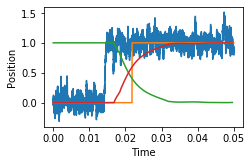

itraj= 26


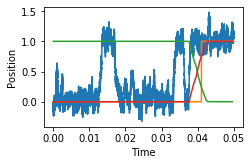

itraj= 27


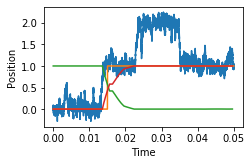

itraj= 28


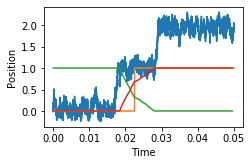

itraj= 29


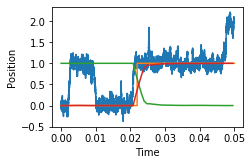

In [13]:
dt0 = 0.000001
for itraj in range(30):
    print('itraj=',itraj)
    filehmm = 'hmmpd_prob_traj'+str(itraj)+'.out'
    filetraj = './traj/trajectory_burnt-bridge_traj'+str(itraj)+'.out'
    A = np.loadtxt(filehmm)
    B = np.loadtxt(filetraj)
    fileeps = 'hmmpd_prob_traj'+str(itraj)+'.eps'
    plt.plot(B[:,0],B[:,1],'-')
    plt.plot(B[:,0],B[:,2],'-')
    plt.plot(np.linspace(0.0,dt0*lagstep*(len(A[:,0])-1),len(A[:,0])),A[:,0])
    plt.plot(np.linspace(0.0,dt0*lagstep*(len(A[:,0])-1),len(A[:,0])),A[:,1])
    plt.xlabel('Time')
    plt.ylabel('Position')
    Size = plt.gcf().get_size_inches()                                                                                                                       
    plt.gcf().set_size_inches(0.6*Size[0],0.6*Size[1])                                                                                                       
    plt.tight_layout()                                                                                                                                       
    plt.savefig(fileeps)
    plt.show()    
